In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = [8, 5]

In [2]:
data_orb = pd.read_csv('data_examples/data_orb_39640s_44.86fitness.csv')
data_normal = pd.read_csv('data_examples/data_normal_39680s_52.57fitness.csv')

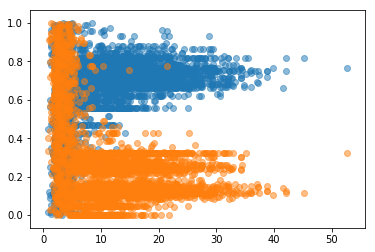

In [3]:
# x = Fitness, y = Food and Poison Distance
plt.scatter(data_normal.Fitness, data_normal.FoodDistance, alpha=0.5)
plt.scatter(data_normal.Fitness, data_normal.PoisonDistance, alpha=0.5)

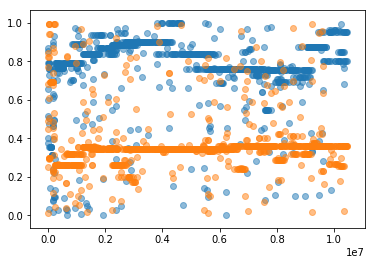

In [5]:
# x = Time, y = Food and Poison Distance
plt.scatter(data_normal.Time, data_normal.FoodDistance, alpha=0.5)
plt.scatter(data_normal.Time, data_normal.PoisonDistance, alpha=0.5)

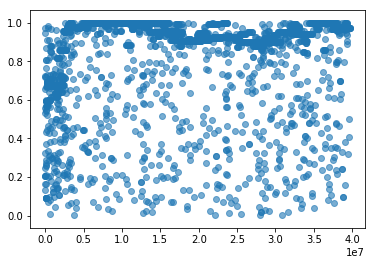

In [4]:
# x = Time,  y = MaxSteerForce
plt.scatter(data_normal.Time, data_normal.MaxSteerForce, alpha=0.6)

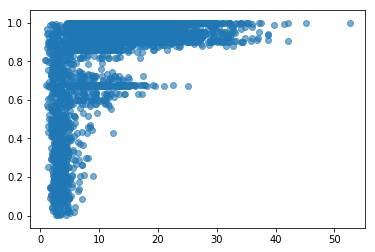

In [5]:
# x = Fitness,  y = MaxSteerForce
plt.scatter(data_normal.Fitness, data_normal.MaxSteerForce, alpha=0.6)

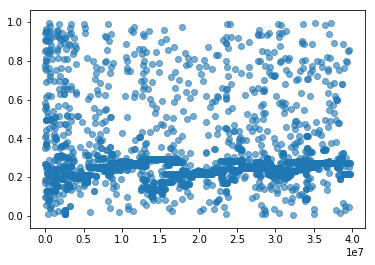

In [6]:
# x = Time,  y = MaxVel_MaxHP
plt.scatter(data_normal.Time, data_normal.MaxVel_MaxHP, alpha=0.6)

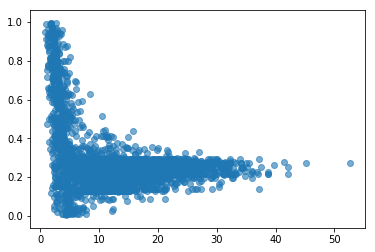

In [7]:
# x = Fitness,  y = MaxVel_MaxHP
plt.scatter(data_normal.Fitness, data_normal.MaxVel_MaxHP, alpha=0.6)

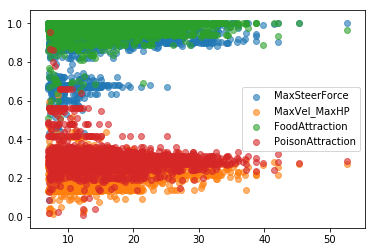

In [8]:
# x = Fitness,  Varius data starting from a decent fitness value.
min_fit = 7
fig, ax = plt.subplots()
ax.scatter(data_normal.Fitness[data_normal.Fitness > min_fit], data_normal.MaxSteerForce[data_normal.Fitness > min_fit], alpha=0.6)
ax.scatter(data_normal.Fitness[data_normal.Fitness > min_fit], data_normal.MaxVel_MaxHP[data_normal.Fitness > min_fit], alpha=0.6)
ax.scatter(data_normal.Fitness[data_normal.Fitness > min_fit], data_normal.FoodAttraction[data_normal.Fitness > min_fit], alpha=0.6)
ax.scatter(data_normal.Fitness[data_normal.Fitness > min_fit], data_normal.PoisonAttraction[data_normal.Fitness > min_fit], alpha=0.6)
ax.legend()

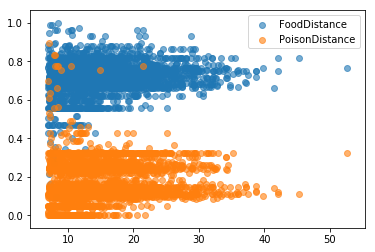

In [9]:
# x = Fitness,  FoodDist and PoisonDist starting from a decent Fitness value
min_fit = 7
fig, ax = plt.subplots()
ax.scatter(data_normal.Fitness[data_normal.Fitness > min_fit], data_normal.FoodDistance[data_normal.Fitness > min_fit], alpha=0.6)
ax.scatter(data_normal.Fitness[data_normal.Fitness > min_fit], data_normal.PoisonDistance[data_normal.Fitness > min_fit], alpha=0.6)
ax.legend()

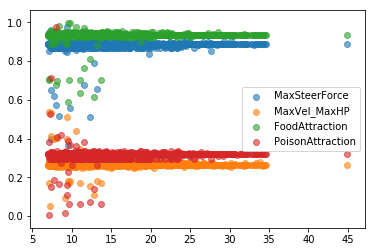

In [10]:
# x = Fitness,  Varius data starting from a decent fitness value.
min_fit = 7
fig, ax = plt.subplots()
ax.scatter(data_orb.Fitness[data_orb.Fitness > min_fit], data_orb.MaxSteerForce[data_orb.Fitness > min_fit], alpha=0.6)
ax.scatter(data_orb.Fitness[data_orb.Fitness > min_fit], data_orb.MaxVel_MaxHP[data_orb.Fitness > min_fit], alpha=0.6)
ax.scatter(data_orb.Fitness[data_orb.Fitness > min_fit], data_orb.FoodAttraction[data_orb.Fitness > min_fit], alpha=0.6)
ax.scatter(data_orb.Fitness[data_orb.Fitness > min_fit], data_orb.PoisonAttraction[data_orb.Fitness > min_fit], alpha=0.6)
ax.legend()

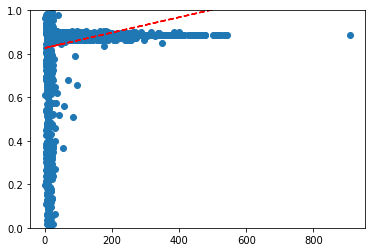

In [11]:
# Trendline for MaxSteerForce in the data_orb simulation data
fig, ax = plt.subplots()
ax.set_ylim([0,1])

x = data_orb.Age
y = data_orb.MaxSteerForce

ax.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

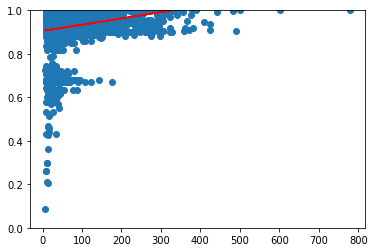

In [12]:
min_fit = 7
fitness_limit = data_normal.Fitness > min_fit

fig, ax = plt.subplots()
ax.set_ylim([0,1])

x = data_normal.FEaten[fitness_limit]
y = data_normal.MaxSteerForce[fitness_limit]

ax.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x,p(x),"r--")

In [13]:
cond = data_orb.Fitness > 14
cond2 = data_normal.Fitness > 14

print("ORB: ", sum(data_orb.Age[cond]) / sum(data_orb.FEaten[cond]))
print("Age: ", sum(data_orb.Age[cond]), "FEaten: ", sum(data_orb.FEaten[cond]))
print("NORMAL: ", sum(data_normal.Age[cond2]) / sum(data_normal.FEaten[cond2]))
print("Age: ", sum(data_normal.Age[cond2]), "FEaten: ", sum(data_normal.FEaten[cond2]))

ORB:  1.7067745267446808
Age:  264713.901999993 FEaten:  155096
NORMAL:  1.6664043918698326
Age:  281460.70099999034 FEaten:  168903


0.0
0.007142857142857143
0.014285714285714285
0.02857142857142857
0.07142857142857142
0.14285714285714285


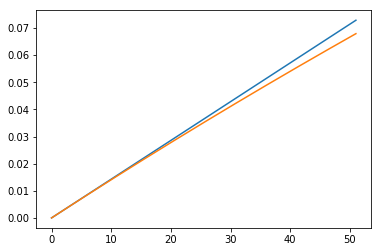

In [164]:
# testing

def fitness(a, e):
    return np.sqrt(a + e * 2)

def fitnessB(a, e):
    return np.sqrt(a + e)

def translate(value, left_min, left_max, right_min, right_max):
    """ returns scaled value from the ranges of the left to right """
    # Figure out how 'wide' each range is
    left_span = left_max - left_min
    right_span = right_max - right_min
    # Convert the left range into a 0-1 range (float)
    value_scaled = float(value - left_min) / float(left_span)
    # Convert the 0-1 range into a value in the right range.
    return right_min + (value_scaled * right_span)

MAX_FITNESS_BREED = 350

MAX_FITNESS_MUTATION = 30
MAX_MUTATION_VALUE = 0.2

a = np.linspace(0, 1000, 1000)
e = np.linspace(0, 800, 1000)
X = fitness(a, e)


B1 = []
B2 = []

for x in X:
    B1.append(translate(x, 0, MAX_FITNESS_BREED, 0, 0.5))

for x in X:
    f = x / (700 + x)
    B2.append(f)


M1 = []
M2 = []

for x in X:
    M1.append(max(0.0001, translate(x, MAX_FITNESS_MUTATION, 0, 0, MAX_MUTATION_VALUE)))


for x in X:

    f = MAX_MUTATION_VALUE/((x*0.1)**2 + 1)

    #M2.append(max(0.0001, translate(x, MAX_FITNESS_MUTATION, 0, 0, MAX_MUTATION_VALUE)))
    #M2.append(MAX_MUTATION_VALUE / ((1+np.log(x + 1))) - )
    M2.append(f)

    
plt.plot(X, B1)
plt.plot(X, B2)
#plt.plot(X, M1)
#plt.plot(X, M2)


print(translate(0, 0, MAX_FITNESS_BREED, 0, 0.5))
print(translate(5, 0, MAX_FITNESS_BREED, 0, 0.5))
print(translate(10, 0, MAX_FITNESS_BREED, 0, 0.5))
print(translate(20, 0, MAX_FITNESS_BREED, 0, 0.5))
print(translate(50, 0, MAX_FITNESS_BREED, 0, 0.5))
print(translate(100, 0, MAX_FITNESS_BREED, 0, 0.5))

In [183]:
np.linspace(1, 10, 10)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])